In [1]:
import glob
import mne
import pandas as pd
import numpy as np
import math
#from statsmodels.stats.anova import AnovaRM
#import statsmodels.api as sm
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression

In [2]:
files_eeg= glob.glob(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_*_b_*.csv", recursive= True)

In [3]:
file=files_eeg[0]

In [4]:
ch_names = ['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
data = pd.read_csv(file) #BEN make sure you need to transpose
data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
tob = data['ToB'][0] - data['TimeStamp'][0]
t_after = tob+5
t_before = tob-5
data = data.transpose()
raw_before = mne.io.RawArray(data, info)
raw_before.crop(tmin = t_before, tmax = tob)
raw_after = mne.io.RawArray(data, info)
raw_after.crop(tmin = tob, tmax = t_after)

Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.


/var/folders/b0/wbdvrdq160d1fx669bdw97k80000gn/T/ipykernel_43297/2537691041.py:6: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
/var/folders/b0/wbdvrdq160d1fx669bdw97k80000gn/T/ipykernel_43297/2537691041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


<RawArray | 4 x 1281 (5.0 s), ~48 kB, data loaded>

In [6]:
ch_names = ['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
PSDs_df_before_delta = pd.DataFrame()
PSDs_df_after_delta = pd.DataFrame()
for file in files_eeg:
    print(file)
    data = pd.read_csv(file) #BEN make sure you need to transpose
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
    data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
    data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
    tob = data['ToB'][0] - data['TimeStamp'][0]
    t_after = tob+5
    t_before = tob-5
    data = data.transpose()
    raw_before = mne.io.RawArray(data, info)
    raw_before.crop(tmin = t_before, tmax = tob)
    raw_after = mne.io.RawArray(data, info)
    raw_after.crop(tmin = tob, tmax = t_after)
    raw_before.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_before.notch_filter(freqs=50, picks = 'eeg')
    #raw_before.plot()
    raw_after.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_after.notch_filter(freqs=50, picks = 'eeg')
    #raw_after.plot()
    psd_before = raw_before.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 0, fmax = 4)
    psd_df_before = psd_before.to_data_frame()
    psd_after = raw_after.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 0, fmax = 4)
    psd_df_after = psd_after.to_data_frame()
    #avergaed_df = psd_df[["freq","RAW_AF7","RAW_AF8"]].mean()
    #avergaed_df=avergaed_df.reset_index().T
    #avergaed_df.columns = avergaed_df.iloc[0]
    #avergaed_df.drop(index=avergaed_df.index[0], axis=0, inplace=True)
    psd_df_before['subject'] = file[-6:-3]
    psd_df_after['subject'] = file[-6:-3]
    PSDs_df_before_delta = PSDs_df_before_delta.append(psd_df_before, ignore_index = True)
    PSDs_df_after_delta = PSDs_df_after_delta.append(psd_df_after, ignore_index = True)

    PSDs_df_after_delta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\delta_after.csv")
    PSDs_df_before_delta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\delta_before.csv")

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-09-44_b_1.csv
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.5

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished



Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-15-40_b_2.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-04--20-21-59_b_8.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_delta = PSDs_df_after_delta.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-07--21-16-32_b_9.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose


Creating RawArray with float64 data, n_channels=4, n_times=33251


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--13-21-46_b_11.csv


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_delta = PSDs_df_before_delta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_

Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=32903


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--12-02-46_b_15.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transiti

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-31-10_b_20.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguo

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--10-42-10_b_24.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_delta = PSDs_df_before_delta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_delta = PSDs_df_after_delta.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-54-10_b_29.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_delta = PSDs_df_before_delta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3572968622.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [8]:
ch_names = ['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
PSDs_df_before_theta = pd.DataFrame()
PSDs_df_after_theta = pd.DataFrame()
for file in files_eeg:
    print(file)
    data = pd.read_csv(file) #BEN make sure you need to transpose
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
    data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
    data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
    tob = data['ToB'][0] - data['TimeStamp'][0]
    t_after = tob+5
    t_before = tob-5
    data = data.transpose()
    raw_before = mne.io.RawArray(data, info)
    raw_before.crop(tmin = t_before, tmax = tob)
    raw_after = mne.io.RawArray(data, info)
    raw_after.crop(tmin = tob, tmax = t_after)
    raw_before.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_before.notch_filter(freqs=50, picks = 'eeg')
    #raw_before.plot()
    raw_after.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_after.notch_filter(freqs=50, picks = 'eeg')
    #raw_after.plot()
    psd_before = raw_before.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 4, fmax = 8)
    psd_df_before = psd_before.to_data_frame()
    psd_after = raw_after.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 4, fmax = 8)
    psd_df_after = psd_after.to_data_frame()
    #avergaed_df = psd_df[["freq","RAW_AF7","RAW_AF8"]].mean()
    #avergaed_df=avergaed_df.reset_index().T
    #avergaed_df.columns = avergaed_df.iloc[0]
    #avergaed_df.drop(index=avergaed_df.index[0], axis=0, inplace=True)
    psd_df_before['subject'] = file[-6:-3]
    psd_df_after['subject'] = file[-6:-3]
    PSDs_df_before_theta = PSDs_df_before_theta.append(psd_df_before, ignore_index = True)
    PSDs_df_after_theta = PSDs_df_after_theta.append(psd_df_after, ignore_index = True)

    PSDs_df_after_theta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\theta_after.csv")
    PSDs_df_before_theta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\theta_before.csv")

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-09-44_b_1.csv
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.5

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-15-40_b_2.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: R

Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: 

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-51-33_b_3.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_theta = PSDs_df_before_theta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Ready.
Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 c

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=32903


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR fil

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--11-43-24_b_14.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose


Creating RawArray with float64 data, n_channels=4, n_times=36447


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-14-46_b_19.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_theta = PSDs_df_before_theta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_theta = PSDs_df_after_theta.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal

Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transiti

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=34479


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\1674061249.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [9]:
ch_names = ['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
PSDs_df_before_alpha = pd.DataFrame()
PSDs_df_after_alpha = pd.DataFrame()
for file in files_eeg:
    print(file)
    data = pd.read_csv(file) #BEN make sure you need to transpose
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
    data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
    data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
    tob = data['ToB'][0] - data['TimeStamp'][0]
    t_after = tob+5
    t_before = tob-5
    data = data.transpose()
    raw_before = mne.io.RawArray(data, info)
    raw_before.crop(tmin = t_before, tmax = tob)
    raw_after = mne.io.RawArray(data, info)
    raw_after.crop(tmin = tob, tmax = t_after)
    raw_before.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_before.notch_filter(freqs=50, picks = 'eeg')
    #raw_before.plot()
    raw_after.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_after.notch_filter(freqs=50, picks = 'eeg')
    #raw_after.plot()
    psd_before = raw_before.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 8, fmax = 12)
    psd_df_before = psd_before.to_data_frame()
    psd_after = raw_after.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 8, fmax = 12)
    psd_df_after = psd_after.to_data_frame()
    #avergaed_df = psd_df[["freq","RAW_AF7","RAW_AF8"]].mean()
    #avergaed_df=avergaed_df.reset_index().T
    #avergaed_df.columns = avergaed_df.iloc[0]
    #avergaed_df.drop(index=avergaed_df.index[0], axis=0, inplace=True)
    psd_df_before['subject'] = file[-6:-3]
    psd_df_after['subject'] = file[-6:-3]
    PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
    PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)

    PSDs_df_after_alpha.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\alpha_after.csv")
    PSDs_df_before_alpha.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\alpha_before.csv")

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-09-44_b_1.csv
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.5

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-15-40_b_2.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)


Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-51-33_b_3.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-03--10-11-00_b_4.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal

Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-04--20-21-59_b_8.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=27606


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-07--21-16-32_b_9.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal

Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--13-21-46_b_11.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--13-04-09_b_16.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-14-46_b_19.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transiti

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-54-00_b_21.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--10-42-10_b_24.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_alpha = PSDs_df_after_alpha.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-37-28_b_28.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_alpha = PSDs_df_before_alpha.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3585771276.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [10]:
ch_names = ['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
PSDs_df_before_beta = pd.DataFrame()
PSDs_df_after_beta = pd.DataFrame()
for file in files_eeg:
    print(file)
    data = pd.read_csv(file) #BEN make sure you need to transpose
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
    data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
    data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
    tob = data['ToB'][0] - data['TimeStamp'][0]
    t_after = tob+5
    t_before = tob-5
    data = data.transpose()
    raw_before = mne.io.RawArray(data, info)
    raw_before.crop(tmin = t_before, tmax = tob)
    raw_after = mne.io.RawArray(data, info)
    raw_after.crop(tmin = tob, tmax = t_after)
    raw_before.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_before.notch_filter(freqs=50, picks = 'eeg')
    #raw_before.plot()
    raw_after.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_after.notch_filter(freqs=50, picks = 'eeg')
    #raw_after.plot()
    psd_before = raw_before.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 12, fmax = 30)
    psd_df_before = psd_before.to_data_frame()
    psd_after = raw_after.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 12, fmax = 30)
    psd_df_after = psd_after.to_data_frame()
    #avergaed_df = psd_df[["freq","RAW_AF7","RAW_AF8"]].mean()
    #avergaed_df=avergaed_df.reset_index().T
    #avergaed_df.columns = avergaed_df.iloc[0]
    #avergaed_df.drop(index=avergaed_df.index[0], axis=0, inplace=True)
    psd_df_before['subject'] = file[-6:-3]
    psd_df_after['subject'] = file[-6:-3]
    PSDs_df_before_beta = PSDs_df_before_beta.append(psd_df_before, ignore_index = True)
    PSDs_df_after_beta = PSDs_df_after_beta.append(psd_df_after, ignore_index = True)

    PSDs_df_after_beta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\beta_after.csv")
    PSDs_df_before_beta.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\beta_before.csv")

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-09-44_b_1.csv
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- 

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-15-40_b_2.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_beta = PSDs_df_before_beta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196

Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: 

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-51-33_b_3.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-03--10-59-24_b_5.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_beta = PSDs_df_before_beta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_beta = PSDs_df_after_beta.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWa

Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-03--13-23-04_b_7.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz



C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hammin

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=31556


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--16-16-30_b_13.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_beta = PSDs_df_before_beta.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_beta = P

Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=18438


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--13-51-52_b_18.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transiti

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--15-14-56_b_22.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--11-20-53_b_25.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-54-10_b_29.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:10: DtypeWarning: Columns (39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\3999250676.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [11]:
ch_names = ['RAW_AF7', 'RAW_AF8', 'ToB', 'TimeStamp']
ch_types = ['misc']+['eeg']*2+['misc']
sfreq = 256
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
#info.set_montage('standard_1020') #set the electrodes' locations
PSDs_df_before_gamma = pd.DataFrame()
PSDs_df_after_gamma = pd.DataFrame()
for file in files_eeg:
    print(file)
    data = pd.read_csv(file) #BEN make sure you need to transpose
    data['TimeStamp'] = pd.to_datetime(data['TimeStamp']).map(pd.Timestamp.timestamp)
    data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
    data = data[['TimeStamp', 'RAW_AF7', 'RAW_AF8', 'ToB']]
    tob = data['ToB'][0] - data['TimeStamp'][0]
    t_after = tob+5
    t_before = tob-5
    data = data.transpose()
    raw_before = mne.io.RawArray(data, info)
    raw_before.crop(tmin = t_before, tmax = tob)
    raw_after = mne.io.RawArray(data, info)
    raw_after.crop(tmin = tob, tmax = t_after)
    raw_before.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_before.notch_filter(freqs=50, picks = 'eeg')
    #raw_before.plot()
    raw_after.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
    raw_after.notch_filter(freqs=50, picks = 'eeg')
    #raw_after.plot()
    psd_before = raw_before.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 31, fmax = 45)
    psd_df_before = psd_before.to_data_frame()
    psd_after = raw_after.compute_psd(method = 'welch', picks = ['RAW_AF7', 'RAW_AF8'], fmin = 31, fmax = 45)
    psd_df_after = psd_after.to_data_frame()
    #avergaed_df = psd_df[["freq","RAW_AF7","RAW_AF8"]].mean()
    #avergaed_df=avergaed_df.reset_index().T
    #avergaed_df.columns = avergaed_df.iloc[0]
    #avergaed_df.drop(index=avergaed_df.index[0], axis=0, inplace=True)
    psd_df_before['subject'] = file[-6:-3]
    psd_df_after['subject'] = file[-6:-3]
    PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
    PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)

PSDs_df_after_gamma.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\gamma_after.csv")
PSDs_df_before_gamma.to_csv(r"C:\Users\Enbal\Documents\GitHub\Ben_analysis\gamma_before.csv")

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-09-44_b_1.csv
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=9855
    Range : 0 ... 9854 =      0.000 ...    38.492 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.5

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-15-40_b_2.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=7367
    Range : 0 ... 7366 =      0.000 ...    28.773 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandw

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished



Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-02--19-51-33_b_3.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45097
    Range : 0 ... 45096 =      0.000 ...   176.156 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-03--10-11-00_b_4.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24965
    Range : 0 ... 24964 =      0.000 ...    97.516 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=41724
    Range : 0 ... 41723 =      0.000 ...   162.980 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=45939
    Range : 0 ... 45938 =      0.000 ...   179.445 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=40289
    Range : 0 ... 40288 =      0.000 ...   157.375 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-04--20-21-59_b_8.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose


Creating RawArray with float64 data, n_channels=4, n_times=27606


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=27606
    Range : 0 ... 27605 =      0.000 ...   107.832 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-07--21-16-32_b_9.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=33251
    Range : 0 ... 33250 =      0.000 ...   129.883 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-07--21-24-24_b_10.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose


Creating RawArray with float64 data, n_channels=4, n_times=24573


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=24573
    Range : 0 ... 24572 =      0.000 ...    95.984 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter len

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--13-21-46_b_11.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=31556
    Range : 0 ... 31555 =      0.000 ...   123.262 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--13-31-36_b_12.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: Dty

Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=73717
    Range : 0 ... 73716 =      0.000 ...   287.953 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-08--16-16-30_b_13.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal

Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=32903
    Range : 0 ... 32902 =      0.000 ...   128.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--11-43-24_b_14.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=36447
    Range : 0 ... 36446 =      0.000 ...   142.367 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--12-02-46_b_15.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=75446
    Range : 0 ... 75445 =      0.000 ...   294.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--13-04-09_b_16.csv


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_

Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=18438
    Range : 0 ... 18437 =      0.000 ...    72.020 secs


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpas

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)

Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--13-24-55_b_17.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=85264
    Range : 0 ... 85263 =      0.000 ...   333.059 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--13-51-52_b_18.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=79239
    Range : 0 ... 79238 =      0.000 ...   309.523 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-14-46_b_19.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarn

Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=143615
    Range : 0 ... 143614 =      0.000 ...   560.992 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transiti

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=57689
    Range : 0 ... 57688 =      0.000 ...   225.344 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-14--14-54-00_b_21.csv


c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_after_gamma = PSDs_df_after_gamma.append(psd_df_after, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal

Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=72763
    Range : 0 ... 72762 =      0.000 ...   284.227 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=90740
    Range : 0 ... 90739 =      0.000 ...   354.449 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=34479
    Range : 0 ... 34478 =      0.000 ...   134.680 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--10-42-10_b_24.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=22262
    Range : 0 ... 22261 =      0.000 ...    86.957 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=48865
    Range : 0 ... 48864 =      0.000 ...   190.875 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--11-29-22_b_26.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=44470
    Range : 0 ... 44469 =      0.000 ...   173.707 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-21-10_b_27.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=51122
    Range : 0 ... 51121 =      0.000 ...   199.691 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-37-28_b_28.csv


C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:10: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file) #BEN make sure you need to transpose
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ToB'][0] = pd.to_datetime(data['ToB'][0]).timestamp()


Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=38125
    Range : 0 ... 38124 =      0.000 ...   148.922 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')


Effective window size : 1.000 (s)
Effective window size : 1.000 (s)
C:\Users\Enbal\Documents\GitHub\Ben_analysis\Data_time\mindMonitor_2023-03-15--14-54-10_b_29.csv


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
c:\Users\Enbal\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\time_frequency\psd.py:51: RuntimeWarning: Mean of empty slice
  spect = np.nanmean(spect, axis=-1)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PSDs_df_before_gamma = PSDs_df_before_gamma.append(psd_df_before, ignore_index = True)
C:\Users\Enbal\AppData\Local\Temp\ipykernel_141

Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=81927
    Range : 0 ... 81926 =      0.000 ...   320.023 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition b

C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:23: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_before.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
C:\Users\Enbal\AppData\Local\Temp\ipykernel_14196\2665202110.py:26: RuntimeWarning: filter_length (1691) is longer than the signal (1281), distortion is likely. Reduce filter length or filter a longer signal.
  raw_after.notch_filter(freqs=50, picks = 'eeg')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel

In [ ]:
#gamma
compute_freq(files_eeg, 31, 45)

In [8]:
PSDs_df_after.plot()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

Creating RawArray with float64 data, n_channels=13, n_times=1096352
    Range : 0 ... 1096351 =      0.000 ...  2192.702 secs
Ready.
Creating RawArray with float64 data, n_channels=13, n_times=1096352
    Range : 0 ... 1096351 =      0.000 ...  2192.702 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 100.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


615 events found
Event IDs: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  255 1001 1004 1005 1006 1011 1012 1013 1014 1021 1022 1023
 1024 1025 1031 1032 1033 2001 2004 2005 2006 2011 2012 2013 2021 2022
 2023 2031 2032 2034 2035 2036 2041 2042 2043 2051 2052 2053 2054 2056
 3001 3002 3003 3004 3006 3011 3012 3013 3021 3022 3024 3026 3027 3031
 3032 3033 3034 3041 3042 3043 3044 3045 4001 4002 4003 4011 4012 4013
 4015 4016 4021 4022 4023 4031 4032 4033 4041 4042 4043 5001 5003 5004
 5005 5006 5011 5012 5013 5021 5022 5023 5024 503

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s finished


0 bad epochs dropped
Not setting metadata
26 matching events found
Setting baseline interval to [-6.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 26 events and 3251 original time points ...
0 bad epochs dropped
Not setting metadata
25 matching events found
Setting baseline interval to [-6.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 25 events and 3251 original time points ...
0 bad epochs dropped
Not setting metadata
25 matching events found
Setting baseline interval to [-6.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 25 events and 3251 original time points ...
0 bad epochs dropped


C:\Users\Enbal\AppData\Local\Temp\ipykernel_6644\1741506340.py:48: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events_commercials_high_201, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)


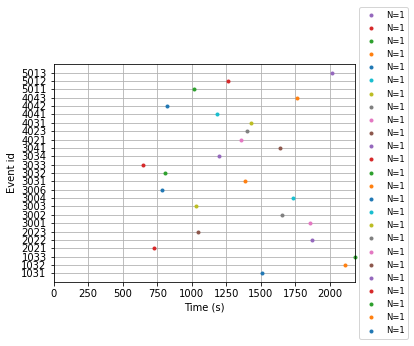

Effective window size : 0.512 (s)


NameError: name 'epochs_bdm1_high' is not defined

In [106]:
#This is for a single file! FAA with different conditions - OLD
filepath = r"C:\Users\Enbal\Dropbox\LabDropbox\Inbal\1st EEG\EEGResults_converted\201.csv"
data = pd.read_csv(filepath).transpose()
ch_names = ['F7', 'Fp1', 'Fpz', 'Fp2', 'F8', 'Fz', 'Cz', 'Pz', 'accel1', 'accel2', 'accel3', 'triggers', 'timestamp']
ch_types = ['eeg']*8+['misc']*5
sfreq = 500
info = mne.create_info(ch_names = ch_names, ch_types=ch_types, sfreq = sfreq)
info.set_montage('standard_1020') #set the electrodes' locations
raw = mne.io.RawArray(data, info)
raw = mne.io.RawArray(data, info)
raw.filter(l_freq = 1, h_freq = 100, picks = 'eeg', method = 'iir') #check for the use of iir_params - these can be specified to be more accute. ALSO, check if I want FIR or IIR. 
raw.notch_filter(freqs=50, picks = 'eeg')
#raw.plot()
#print(raw.info)

#to divide the events into two arrays - for bdm1 and bdm2:
events = mne.find_events(raw, stim_channel='triggers')
locations = np.where(events == 1) #take only the triggers locations of the trigger=1
locations = locations[0] #leave only a list of the locations of the releavnt trigger
locations = np.subtract(locations, 1) #take the location of the triggers before the 1 trigger, as this is when the stimulus ends
a = np.split(events, locations) #split the events array into three arrays based on the releavnt event locations
events_bdm1 = a[1] #assign the right arrays to each of the releavnt parts :)
events_bdm2 = a[2]

list_bdm1_high_201 = bdm1_high_df_list_for_EEG[0]['ItemIndex'].values.tolist() #make the triggers from the behavioral experiment a list
list_bdm1_low_201 = bdm1_low_df_list_for_EEG[0]['ItemIndex'].values.tolist()
list_bdm2_high_201 = bdm2_high_df_list_for_EEG[0]['ItemIndex'].values.tolist()
list_bdm2_low_201 = bdm2_low_df_list_for_EEG[0]['ItemIndex'].values.tolist()
events_bdm1_high_201 = events_bdm1[np.in1d(events_bdm1[:,2], list_bdm1_high_201)] #take only the events of the relevant condition
events_bdm1_low_201 = events_bdm1[np.in1d(events_bdm1[:,2], list_bdm1_low_201)]
events_bdm2_high_201 = events_bdm2[np.in1d(events_bdm2[:,2], list_bdm2_high_201)]
events_bdm2_low_201 = events_bdm2[np.in1d(events_bdm2[:,2], list_bdm2_low_201)]
#reject_criteria = dict(eeg=150e-6)       # 150 µV
epochs_bdm1_high_201 = mne.Epochs(raw, events_bdm1_high_201, tmin=-6, tmax=0.5,
                    #reject=reject_criteria,
                    preload=True) #understand better the reject criteria!! if I use it now, it drops all epochs! also, I need to understand how to epoch better. Right now I epoch based on all events, but I need to decide how exectly to do it...
epochs_bdm1_low_201 = mne.Epochs(raw, events_bdm1_low_201, tmin=-6, tmax=0.5,
#reject=reject_criteria,
preload=True) #understand better the reject criteria!! if I use it now, it drops all epochs! also, I need to understand how to epoch better. Right now I epoch based on all events, but I need to decide how exectly to do it...
epochs_bdm2_high_201 = mne.Epochs(raw, events_bdm2_high_201, tmin=-6, tmax=0.5,
                    #reject=reject_criteria,
                    preload=True) #understand better the reject criteria!! if I use it now, it drops all epochs! also, I need to understand how to epoch better. Right now I epoch based on all events, but I need to decide how exectly to do it...
epochs_bdm2_low_201 = mne.Epochs(raw, events_bdm2_low_201, tmin=-6, tmax=0.5,
#reject=reject_criteria,
preload=True) #understand better the reject criteria!! if I use it now, it drops all epochs! also, I need to understand how to epoch better. Right now I epoch based on all events, but I need to decide how exectly to do it...

#fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)
mne.viz.plot_events(events_bdm2_high_201, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

psd_bdm1_high_201 = epochs_bdm1_high_201.compute_psd(method = 'welch', fmin = 8, fmax = 13, picks = ['F7', 'F8'])
df_psd_bdm1_high_201 = psd_bdm1_high_201.to_data_frame() 
df2 = df_psd_bdm1_high_201[["freq","F7","F8"]].mean()
df3=df2.reset_index().T
df3.columns = df3.iloc[0]
df3.drop(index=df3.index[0], axis=0, inplace=True)
df3['F7_log'] = math.log(df3['F7'])
df3['F8_log'] = math.log(df3['F8'])
df3['alpha_asymmetry'] = df3['F7_log']-df3['F8_log']

epochs_bdm1_high.compute_psd().plot_topomap()
epochs_bdm1_low.compute_psd().plot_topomap()

In [ ]:
#find the triggers - old..
#events = mne.find_events(raw, stim_channel='triggers')
#print(events[:10])  # show the first 10
#rows=np.where(events[:,2]>105) #1-105 are the triggers signifting the appearance of the slider, and hence the response. 
#eventsNew=(events[rows])